This notebook was made to see the particle movement which reflect surface currents between new river treatment simulation and the original one

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
import matplotlib.cm as cm
from matplotlib import animation
from numpy import *
from pylab import *
%matplotlib inline

load bathymetry

In [2]:
grid1 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea5.nc','r')
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc','r')

surface particles

In [3]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/14days_norefraxml/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/default/ariane_trajectories_qualitative.nc','r')

In [4]:
def compare_tracks( f1, f2, grid1, grid2, i):
    """This function was used to make plots of 
        number i particle tracks comparison. f1 & f2
        are trajetory nc files respectively, grid1
        and grid2 are bathymetry file respectively,
        return the figure"""
    f = [f1, f2]
    grid = [grid1, grid2]
    fig, axs = plt.subplots(1,2,figsize=(20,10))
    for ff, ax, gridd in zip(f, axs, grid): 
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        ax.scatter(lont[1:,i],latt[1:,i],color='r')
        ax.scatter(lont[0,i],latt[0,i],color='0.30',marker='s')
        viz_tools.plot_coastline(ax,gridd,coords='map')
        ax.set_xlim([-123.8,-122.8])
        ax.set_ylim([48.5,49.5])
        ax.set_xlabel('longitude')
        ax.set_ylabel('latitude')
        if ax ==axs[0]:
            ax.set_title('Surface current for new')
        else:
            ax.set_title('Surface current for original')
        
    return fig

In [5]:
def compare_tracks_safig(f1, f2, grid1, grid2, i):
    """This function was used to make a plot of 
        number i particle tracks in the same figure.
        f1 & f2 are trajetory nc files respectively, grid1
        and grid2 are bathymetry file respectively,
        return the figure"""
    f = [f1, f2]
    grid = [grid1, grid2]
    n = np.arange(2)
    colors = cm.rainbow(np.linspace(0, 1, len(n)))
    legd = ['new', 'previous']
    fig, axs = plt.subplots(1,1,figsize=(10,7))
    for ff, gridd, c, le in zip(f, grid, colors, legd): 
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        axs.scatter(lont[1:,i],latt[1:,i],color=c, label = le)
        axs.scatter(lont[0,i],latt[0,i],color='0.30',marker='s')
        viz_tools.plot_coastline(axs,gridd,coords='map')
        axs.set_xlim([-123.8,-122.8])
        axs.set_ylim([48.5,49.5])
        axs.set_xlabel('longitude')
        axs.set_ylabel('latitude')
        axs.set_title('particle comparison')
        axs.legend()
        
    return fig

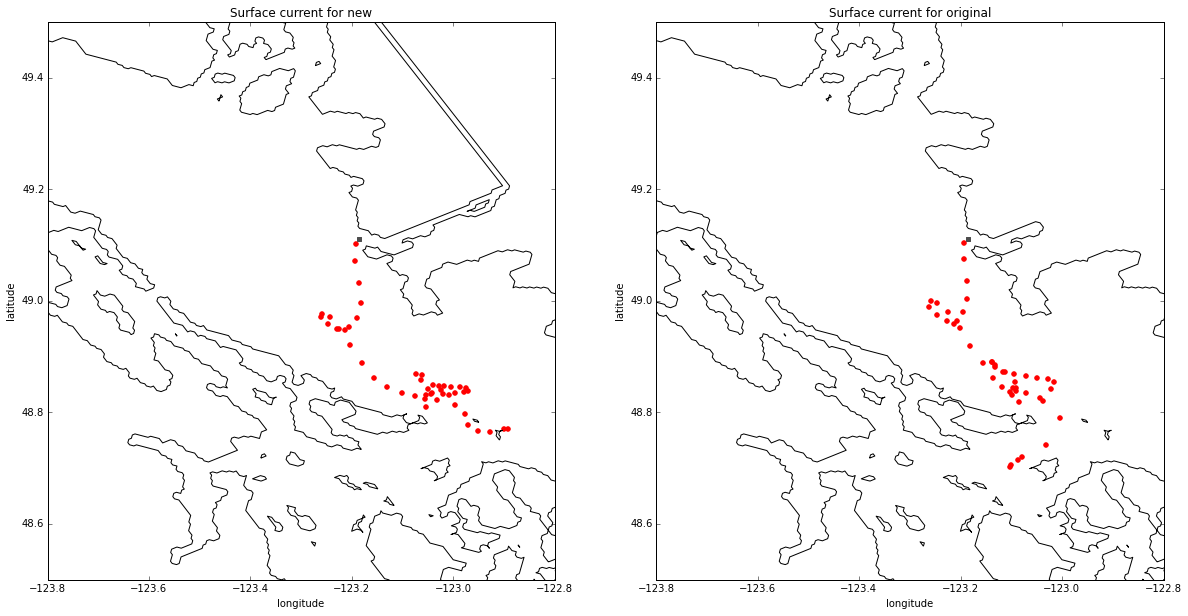

In [6]:
fig = compare_tracks(f1,f2, grid1,grid2, 0)

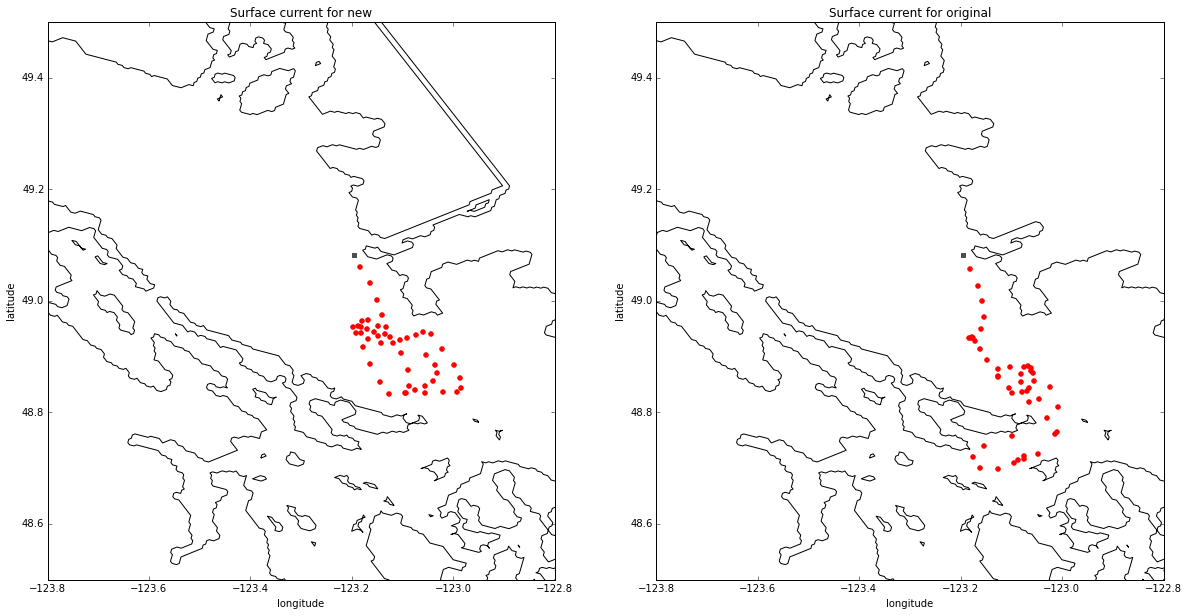

In [7]:
fig = compare_tracks(f1,f2, grid1,grid2, 1)

plot in the same figure to see the difference

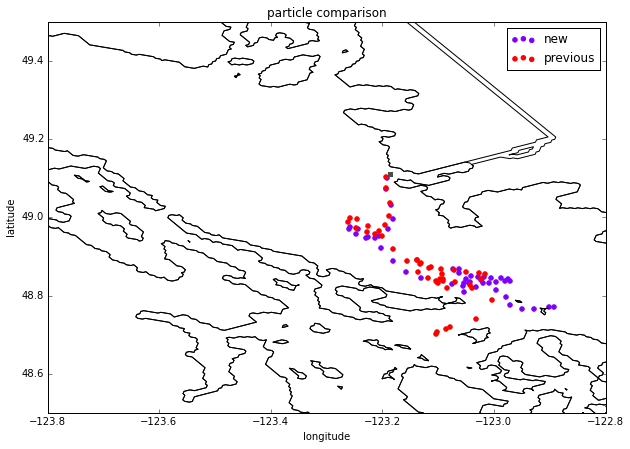

In [8]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 0)

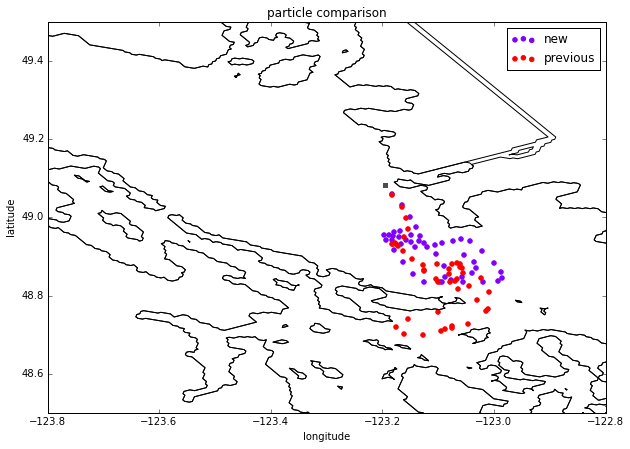

In [9]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 1)

Some other particles at different locations in the plume

In [10]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/14days_norpoint/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/\
result/default_norpoint/ariane_trajectories_qualitative.nc','r')

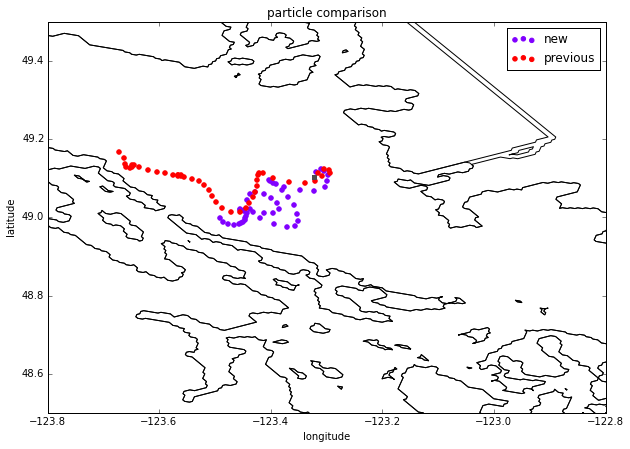

In [16]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 0)

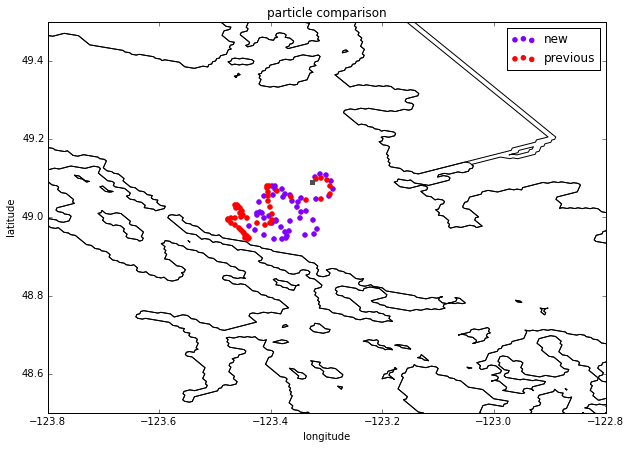

In [17]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 1)

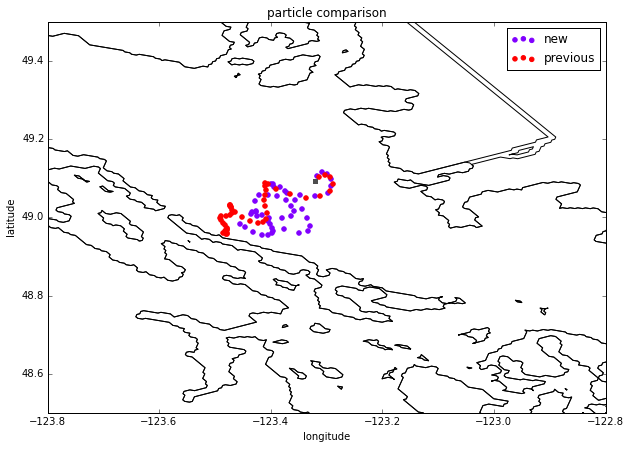

In [18]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 2)

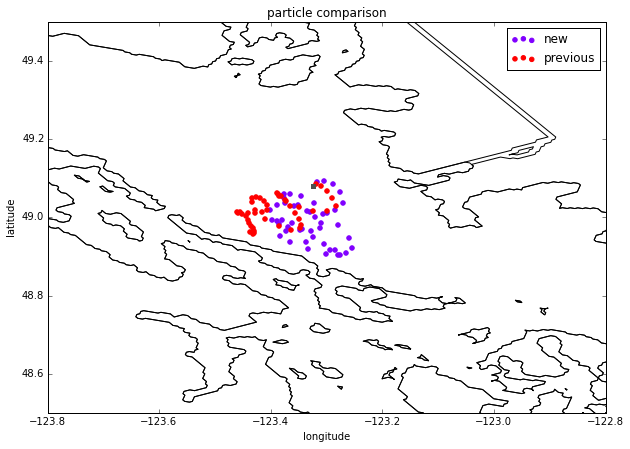

In [19]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 3)

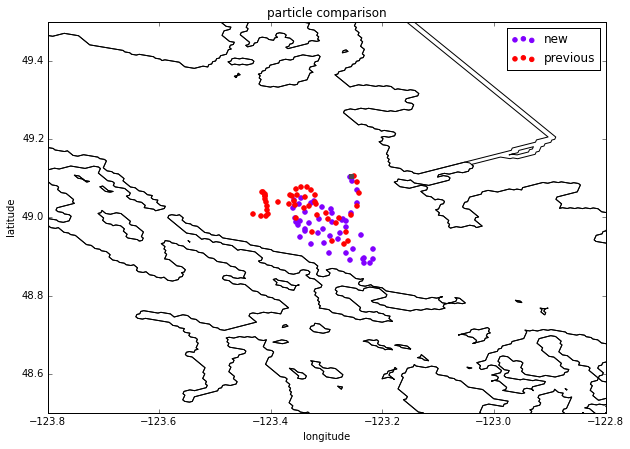

In [11]:
fig = compare_tracks_safig(f1,f2, grid1,grid2, 4)